##### <h1>Graph Clustering in Python: a workshop</h1>
<p>Frank Kelly, Data Scientist at Analytics SEO</p>
<a href='https://twitter.com/norhustla'>@norhustla</a>
<p>DevFest 2015, Nantes</p>

<center><img src='https://www.dropbox.com/s/6ddlpuxf0yy6vl8/front_page?dl=1' width = 600 height = auto></center>

## Contents of this workshop


1. Graphs and our use case

2. Clustering

3. Evaluation and other challenges





### To follow along:

* Install Python 3 (https://www.python.org/)
* (on Mac Terminal) <code>> pip install ipython pandas numpy igraph matplotlib networkx</code>
* dataset: <code> git clone https://github.com/frankdatasci/graph-clustering-lab </code>
* recommend iPython / Jupyter (code in the browser) - can run hosted for free here: (https://try.jupyter.org/)


### Part 1: Graphs 

a. An overview of my use case
 * Why are we doing this?  (and what if we didn't?)

b. What is a graph?
 * Explain what a graph is, what human generated data looks like and uses of graphs

c. How to represent graphs in Python
 * Explain graph theory and show how to code up a graph, how to visualise quickly inside and out of Python 




## Our use case

* Customers pay for  **search keyword recommendations**
* What they get is **expensive, or time/resource intensive and often inaccurate**

## Our use case

* Customers pay for  **search keyword recommendations**
* What they get is **expensive, or time/resource intensive and often inaccurate**
* Nowhere to go?
 * With **data, graphs and analysis** we plan to help them get out of this fix

## Search keywords



In [3]:
import pandas as pd
from IPython.display import display

keywords = pd.read_csv('../data/www.greatbritishchefs.com_43_louvain_graph_clustered_weighted_labelled.csv',encoding = "ISO-8859-1", error_bad_lines=False)\
.loc[:,('Keyword', 'Search Volume', 'Rank', 'URL')]

display(keywords.sample(5))

,Keyword,Search Volume,Rank,URL
498281,baking how to,0,14,www.theguardian.com/lifeandstyle/series/howtobake
404106,roasted beetroot sweet potato,0,14,www.womanandhome.com/recipes/291394/roasted-sw...
541335,uses of liquid caramel,0,13,www.deliaonline.com/how-to-cook/sauces-and-dre...
444502,how to cook a trout whole,0,2,www.bbcgoodfood.com/recipes/simple-herb-baked-...
172089,jacob's ladder beef ribs recipe,0,12,www.youtube.com/watch?v=6OPxv_PdQPw


## How can we decide which keywords to optimise for?


* Sort by a factor (e.g. search, rank, frequency)
* How many keywords will have an impact?


## How can we group keywords together?


* Manually group keywords by relevancy or try to match the website structure
* Does this grouping match that from real a search algorithm?

## Search algorithm: a feedback loop?

*“In the context of organic search results, your click through rate is how often people click on your site out of all the times your site gets shown in search results. A low CTR means that, no matter how well your site is ranking, users aren’t clicking through to it. This may indicate that they don’t think your site will meet their needs, or that some other site looks better.”*
- Google Webmaster Central Blog

http://www.beacontechnologies.com/blog/2013/10/how-does-google-use-click-through-rates/

## Results from clustering without a graph



<a href="http://insidebigdata.com/2015/07/20/spark-101-spark-streaming-and-graphx-at-netflix/">GraphX in the Netflix Recommender System</a>
<p></p>
<a href='http://www.slideshare.net/sympapadopoulos/a-graphbased-clustering-scheme-for-identifying-related-tags-in-folksonomies'>A Graph-based Clustering Scheme for Identifying Related Tags in Folksonomies<a>

<h3>What is a graph?</h3>

<h4>Answer: A natural mapping used by many disciplines for a structure of interlinked nodes</h4>

<table style="width:100%">
  <tr>
    <td>Tech</td>
    <td>e.g. Telecomms networks,  Power grids</td>
  </tr>
  <tr>
  <td>Information</td>
    <td>e.g. the Internet, Research paper citations</td>
  </tr>
  <tr>
  <td>Biological</td>
    <td>e.g. Gene regulatory networks, Neural networks</td>
  </tr>
  <tr>
  <td>Social</td>
    <td>e.g. Communication networks, Social media, Online communities</td>
  </tr>
    <tr>
  <td>Economic</td>
    <td>e.g. Trade networks, Finanical networks, Collaboration networks</td>
  </tr>
</table>

<p> Graphs are crucial and interdisciplinary </p>

## What the keyword URL data looks like

<img src="https://www.dropbox.com/s/63yizksp5l7dahi/Screenshot%202015-11-06%2015.20.23.png?dl=1" width = 700 height = auto></img>


### in French...

<img src='https://www.dropbox.com/s/rw1pu6w8raumjkp/Screenshot%202015-11-06%2015.05.20.png?dl=1'></img>

<h3>What types of graph are there?</h3>

- Homogenous / heterogenous
- Directed / undirected / weighted
- Bi-typed

## Types of graph
### The undirected graph

<img src='https://www.dropbox.com/s/ne6w4vt1oorqpe8/Screenshot%202015-10-26%2007.02.21.png?dl=1' width =200 height =auto align = center></img>

### The directed graph


<img src='https://www.dropbox.com/s/d49893i4w203vbc/Screenshot%202015-10-26%2007.05.35.png?dl=1' width =200 height =auto></img>

* **Directed graph** (digraph): if each edge has a direction (tail → head)


### The weighted graph

<img src='https://www.dropbox.com/s/nkxfub1eg5wr095/Screenshot%202015-10-26%2007.05.57.png?dl=1' width =200 height =auto></img>


* **Weighted graph**: If a weight wij (usually a real number) is associated with each edge vij

### Why use a graph to represent data?



* Graph databases often faster than relational for associative data sets
* Map more directly to the structure of object-oriented applications.
* They can scale more naturally
* Depend less on a rigid schema




<h3>Challenges presented by graphs</h3>

* High computational cost

* Sophisticated graphs may involve weights and/or cycles 

* High dimensionality

* Sparsity



# 1c: 
Explain graph theory and show how to code up a graph, how to visualise quickly inside and out of Python

<h3>Graph Theory</h3>
<p>How do we mathematically define a graph?</p>


a graph $$G = (V, E)$$

<p>where: V is a set of *n* vertices, or nodes, and E is a collection of pairs of V</p>

where: $$n = |V|$$ 


* graph is *finite* if V and E are finite sets
* graph is *connected* if there exists a path from any vertex to any other

<img src='http://igraph.org/img/igraph3.svg'></img> <h2>igraph in Python (3)</h2>
<p></p>
<code>$$ pip install igraph</code>
<p></p>
<a href="http://igraph.org/python/doc/tutorial/tutorial.html">Tutorial – read online</a>
<p></p>
<a>http://igraph.org/</a>



There are several options for building graphs in Python (Neo4j, NetworkX, graph-tool)

I'll start with some data taken from Neo4j example, which I throughly recommend.
Here is how to build a graph in igraph.

Python version has limitations in documentation (R version is far better)

In [4]:
from igraph import *

g = Graph()

print(summary(g))

IGRAPH U--- 0 0 -- 
None


## Example from actor movie database
*courtesy of Neo4j tutorials*

<img src='http://neo4j.com/wp-content/themes/neo4jweb/assets/images/neo4j-logo-2015.png'></img>

<img src = 'https://www.dropbox.com/s/yn34r6m2u742s47/Screenshot%202015-11-06%2014.51.22.png?dl=1' width = 300, height = auto></img>

...Load in this data to Pandas DataFrame

In [20]:
nodesDF = pd.read_csv('../data/nodesDF.csv').drop(['new_index'], axis=1)
display(nodesDF.sample(5))

edgesDF = pd.read_csv('../data/edgesDF.csv').drop(['Unnamed: 0'], axis=1)
display(edgesDF.sample(5))

,id,name
8,8,Christopher Guest
32,32,John Cusack
30,30,Kelly Preston
27,27,Bonnie Hunt
85,85,Patricia Clarkson


,source,target
759,99,101
305,34,33
599,80,83
671,91,16
648,42,88


## iGraph example

**Add vertices**

In [21]:
g = Graph()
g.add_vertices(range(len(nodesDF)))

g.vs["name"] =  nodesDF["name"].values
print(summary(g))



IGRAPH UN-- 102 0 -- 
+ attr: name (v)
None


## iGraph example

**Add edges**

In [22]:
# Need to create a list of tuples
tupleList  = (edgesDF.loc[:, ("source","target")]).apply\
    (lambda x:(x[0], x[1]), axis=1).values


g.add_edges(tupleList)


print(summary(g))

IGRAPH UN-- 102 768 -- 
+ attr: name (v)
None


## How to visualise your graph in iPython
<h4>Graphviz</h4>
<img src='https://upload.wikimedia.org/wikipedia/en/thumb/4/48/GraphvizLogo.png/256px-GraphvizLogo.png' width=250 height = auto></img>
<a href='http://pypi.python.org/pypi/pygraphviz'>pygraphviz</a>

In [8]:
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# networkx graph
G=nx.Graph()
# ad edges with red color
G.add_edge(1,2,color='red')
G.add_edge(2,3,color='red')
# add nodes 3 and 4
G.add_node(3)
G.add_node(4)

# convert to a graphviz agraph
A=nx.to_agraph(G)


/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


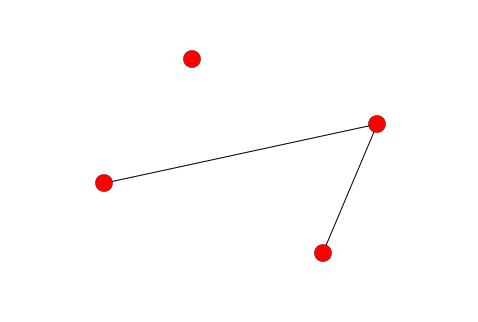

In [87]:
nx.draw(A)


<h4>d3.js</h4>
<img src='https://www.dropbox.com/s/ddh504c49ne9e78/Screenshot%202015-10-27%2006.54.30.png?dl=1'></img>
<a href='http://d3js.org/'>d3.js website</a>

## How to visualise your graph using D3

* Convert nodes and edges to JSON format
* Create a small HTML file to load the JSON data and display using alchemy.js
* Run an http server from the command line

In [26]:
import json

# little script to deal with numpy values
def default(o):
    if isinstance(o, np.integer): return int(o)
    raise TypeError

def df_to_json_save(nodesDF, edgesDF):

    # filter the edge dataframe and convert to dict
    edgesDict = edgesDF.loc[:,('source', 'target')].to_dict(orient='index')
    nodesDict = nodesDF.to_dict(orient='index')

    # collect arrays of dict values
    edges_array = []
    nodes_array = []
    edges_array = list(edgesDict.values())
    nodes_array = list(nodesDict.values())

    # assemble required JSON structure for alchemy
    res = {'edges': edges_array, 'nodes': nodes_array}

    # print(json.dumps(res, default=default))

    # save file locally as JSON
    text_file = open("../data/actors.json", "w")
    text_file.write(json.dumps(res, default=default))
    text_file.close()

df_to_json_save(nodesDF, edgesDF)

* Set an the http server to a port (not the same as iPython default 8888)

<code>> python3 -m http.server 8899 &</code>


* Now go to this page in your browser

<a>http://localhost:8899/graph.html</a>

* What you should see:

<img src='https://www.dropbox.com/s/dalvub99p2zgevx/Screenshot%202015-11-06%2013.51.59.png?dl=1' width =250 height = auto></img>

## Graphs: key concepts

**Degree** of a vertex: Number of edges connecting to it

**IN degree** and **OUT degree** used for directed graphs


In [93]:
g_dir = Graph.as_directed(g)

print(summary(g_dir))

IGRAPH DN-- 102 1536 -- 
+ attr: name (v)
None


### Matrix representation of a graph

<p>How do we represent the structure of a graph as a matrix?</p>
<p></p>
<p>We use an <strong>adjacency matrix</strong></p>
<p></p>
$$|V| \times |V|$$

**Undirected** graphs give a symmetric
matrix of 1s and 0s
<p></p>

<code>[[0, 1, 0, 0]
 [1, 0, 1, 1]
 [0, 1, 0, 1]
 [0, 1, 1, 0]]</code>
 
 
 <p>$$A_ij=1 $$ if there is a edge connecting vertex i and vertex j</p>
 





In [10]:
import numpy as np
# Get adjacency matrix from our graph
A = g.get_adjacency()

print (np.shape(A.data))
print(np.matrix(A.data))  
# sparse...

(102, 102)
[[0 2 2 ..., 0 0 0]
 [2 0 6 ..., 0 0 0]
 [2 6 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 2 2]
 [0 0 0 ..., 2 0 2]
 [0 0 0 ..., 2 2 0]]


**Directed** graphs give an asymmetric
matrix of 1s and 0s

<code>[[0, 0, 0, 0]
 [1, 0, 1, 1]
 [0, 1, 0, 1]
 [0, 1, 0, 0]]</code>



<p>$$A_ij = 1$$ if there is an edge from j to i, 0 otherwise</p>



In [95]:
# Get adjacency matrix from our graph
A = g_dir.get_adjacency()

print (np.shape(A.data))
print(np.matrix(A.data))  
# sparse...

(102, 102)
[[0 2 2 ..., 0 0 0]
 [2 0 6 ..., 0 0 0]
 [2 6 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 2 2]
 [0 0 0 ..., 2 0 2]
 [0 0 0 ..., 2 2 0]]





**Weighted** graphs give a matrix of numbers
(weights )

<code>[[0, 0, 0, 0]
 [1, 0, 0.5, 1]
 [0, 0.9, 0, 0.7]
 [0, 0.1, 0, 0]]</code>



<p>there is a weight $$W_ij$$ associated with each edge $$V_ij$$</p>

## Spectral graph theory

... this technique reveals graph properties other than the pure edge structure

We can re-write the Adjacency Matrix
as 
$$A = U\Delta U^T$$

where:
$U$ is an orthogonal matrix containing eigenvectors
and
$\Delta$ is a diagonal matrix containing eigenvalues

These eigenvalues represent the **spectrum** of the graph

## Laplacian matrix

$$L = D - A$$

Where $A$ is the Adjacency matrix, and $D$ is the diagonal 'degree' matrix

In [11]:
D = np.diag(g.degree())
print (np.shape(D), type(D))
L = g.laplacian()
print (np.shape(L), type(L))

(102, 102) <class 'numpy.ndarray'>
(102, 102) <class 'list'>


<h3>Why use Python to do this anyway?</h3>

<img src = 'https://www.python.org/static/img/python-logo@2x.png'></img>


* prototyping

&

* production

## 2a 

know what graph clustering is, and have a top level view of methods as well as an inkling of which approches are appropriate to which application know how to cluster graph data from different formats with a variety of techniques in Python

### Part 2: Clustering

a. What is clustering, and graph clustering (community detection)

b. Be aware of three of the many graph clustering methods

c. What (and when and where) are the different approaches to clustering used;
 * how to apply the appropriate clustering method to your application in Python
 


## What is clustering?


#### An INFORMAL definition
<p>A <strong>cluster</strong> is a set of entities that are closer to each other than to the rest of the data set</p>

<h4>In machine learning and/or data mining</h4>
<p>It is known as unsupervised learning, no prior knowledge of the dataset's underlying structure</p>



### Clustering in networks and graphs: it's different


#### Real-world graphs are not random

<img src = 'https://www.dropbox.com/s/ifkngqaitk98wlb/Screenshot%202015-11-06%2014.55.55.png?dl=1' width = 600 height = auto></img>


* Short distance between nodes
* Ties not reciprocal
* Skewed degree distribution
 * edge distribution is inhomogenous

See more : http://en.wikipedia.org/wiki/Preferential_attachment




### ...this edge distribution leads to natural groupings of nodes


<p>In order to identify these natural groupings, we perform clustering or **community discovery**</p>

Groups can be distinguished by: 
* high internal edge proximity
* ...and low edge density between them



<p>We are able to group similar nodes using:</p> 
<p>(a) topological features extracted from the graph</p>
<p>(b) node/edge characteristics</p>
<p></p>
...leaving us with:
*a set of nodes with more internal edges than there are to the rest of the graph*


Definitions of graph clustering:
    
* clustering within a single graph

* clustering sets of graphs



<h3>Other metrics for networks: ranking</h3>

* Ranking evaluates networks based on a ranking function
 * that mathematically demonstrates characteristics of objects.
 
* Compare two objects of the same type
 * either qualitatively or quantitatively, in a partial order. 
 * PageRank and HITS = most renowned over information networks


<a href="http://zuse9-2.se.cuhk.edu.hk/~hcheng/paper/edbt09_ysun.pdf">more detail here</a>

### Clustering and ranking

* ... are often regarded as orthogonal, separate techniques,

However: 

*applying either of them over information
networks often leads to incomplete, or sometimes
rather biased, analytical results.*

* ranking web data alone leads to 'dumb' results,
 * e.g., ranking duck recipes, computer science conferences

* clustering thousands of blog authors into one cluster without distinction is also useless.


Combining both => more comprehensible results


<a href="http://zuse9-2.se.cuhk.edu.hk/~hcheng/paper/edbt09_ysun.pdf">from here</a>

### Summary

<p></p>
<p><strong>Clustering</strong>: an unsupervised learning problem whereby we aim to group subsets of entities with one another based on some notion of similarity.
</p>
<p>
<p><strong>Community detection</strong>: Clustering as applied to real world networks; grouping nodes into clusters according to their similarity</p>

## Graph clustering methods


Exploration of community detection methods available in igraph library



### Hierarchical methods 

* Edge-betweenness


* Fast-greedy



### Edge-betweenness community detection

* Top-down process

* The number of shortest paths that pass through a given edge

* remove edges in decreasing order


In [28]:
from time import time

t0 = time()
# calculate dendrogram
dendrogram = g.community_edge_betweenness()
# convert it into a flat clustering
clusters = dendrogram.as_clustering()
# get the membership vector
membership = clusters.membership

print("Modularity:", np.round(clusters.modularity,2))

nodesDF["cluster"] = membership

print("%s : %.2fs" % ("Edge betweenness clustering\n", time() - t0))

display(nodesDF.sample(5))

# Plot the result
df_to_json_save(nodesDF, edgesDF)

Modularity: 0.59
Edge betweenness clustering
 : 0.24s


,id,name,cluster
62,62,Zach Grenier,2
70,70,Paul Bettany,2
49,49,Rosie O'Donnell,2
32,32,John Cusack,1
7,7,Aaron Sorkin,1


### Fast greedy community detection

* Bottom-up process (agglomerative)

* Optimises modularity

* Start with every vertex belonging to a different community
 * merge if increases modularity


### Louvain community detection

* Iterative process, causes perturbations to community state

* Optimises modularity of communities

* Until global modularity can be improved


In [30]:
import louvain

t0 = time()

part = louvain.find_partition(g, method="Modularity")

nodesDF["cluster"] = part.membership

print("Modularity:", np.round(part.modularity,2))

print("%s : %.2fs" % ("Louvain clustering with modularity\n", time() - t0))


display(nodesDF.sample(5))

# Plot the result
df_to_json_save(nodesDF, edgesDF)

Modularity: 0.61
Louvain clustering with modularity
 : 0.01s


,id,name,cluster
67,67,Takeshi Kitano,1
95,95,Bill Paxton,0
40,40,Werner Herzog,5
23,23,Val Kilmer,7
21,21,Kelly McGillis,7


## Notes on Louvain performance

* Much faster than other modularity - based methods

### Spin-glass community detection

* From statistical mechanics

* Based on 'Potts' model 
https://en.wikipedia.org/wiki/Potts_model

* Spin states of particles at the end of various simulations define communities


In [31]:
from time import time

t0 = time()
# calculate dendrogram
clusters = g.community_spinglass(weights=None, spins=25)
# convert it into a flat clustering
# clusters = dendrogram.as_clustering()
# get the membership vector
membership = clusters.membership

nodesDF["cluster"] = membership
print("Modularity:", np.round(clusters.modularity,2))
print("%s : %.2fs" % ("Community spin glass clustering\n", time() - t0))

display(nodesDF.sample(5))

# Plot the result
df_to_json_save(nodesDF, edgesDF)


Modularity: 0.6
Community spin glass clustering
 : 0.89s


,id,name,cluster
51,51,Victor Garber,5
38,38,Annabella Sciorra,6
27,27,Bonnie Hunt,0
3,3,Carrie-Anne Moss,1
48,48,Tom Hanks,5


### Notes on spinglass method performance

* Not fast
* Not deterministic (due to simulation)
* Tuneable

* Feature that allows 'negative links'; 
 * i.e. node preference to 'not' be in a community

### Walk-trap community detection

* based on random walks

* idea that not many edges lead outside a community

* bottom-up merging of results of many short random walks of 3, 4 or 5 steps

* modularity used to select cuts

In [34]:
from time import time

t0 = time()
# calculate dendrogram
dendrogram = g.community_walktrap()
# convert it into a flat clustering
clusters = dendrogram.as_clustering()
# get the membership vector
membership = clusters.membership

nodesDF["cluster"] = membership
print("Modularity:", np.round(clusters.modularity,2))
print("%s : %.2fs" % ("Community walk trap clustering\n", time() - t0))

display(nodesDF.sample(5))

# Plot the result
df_to_json_save(nodesDF, edgesDF)


Modularity: 0.58
Community walk trap clustering
 : 0.00s


,id,name,cluster
89,89,Oliver Platt,5
57,57,Liv Tyler,0
97,97,Diane Keaton,0
80,80,Rain,10
1,1,Hugo Weaving,0


### Notes on walk trap method performance

* Very fast, though slower than 'fast greedy' approach
* Relatively accurate


<h3>- Spectral clustering</h3> 
<p>Popular, and growing!</p>



In [53]:
from sklearn.cluster import spectral_clustering

obj = spectral_clustering(np.matrix(A.data), 5)

/usr/local/lib/python3.4/site-packages/sklearn/manifold/spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


### Part 3: Evaluation and other challenges

a. What are typical evaluation methods used ?
 * (graph cutting including modularity, similarity measures including pagerank)

b. The challenges around labelling your clusters

c. Conclusion
 * Final thoughts and what worked for us
 


## How do you evaluate your graph clusters?


#### measures for graph cutting:
* mincut 
* ratio cut 
* formalised cut 
* conductance
* modularity



* can optimise with any one of these functions; upon maximising/minimising the resulting metric communities will appear

## How do you evaluate your graph clusters?


#### measures for graph cutting:
* mincut 

 * **Minimum number of edges** to partition this graph into 2 or more clusters
 * Quite poor
 
 <img src = 'https://www.dropbox.com/s/gm74vq1i5i3fh7a/Screenshot%202015-11-06%2014.47.00.png?dl=1'></img>


* ratio cut 

-> Sum of edge weights connecting cluster to the rest of the graph,  normalised by the size of cluster C

mincut -> originally intended for computer networks, not so good at finding communities ('finds' them regardless) and always finds a fixed number.

* normalised cut 
 * sum of edge weights connecting cluster to the rest of the graph,  normalised by the **degree** of cluster C

* conductance
 * The sum of the normalised cut of individual partitions

### modularity

* The sum of different internal edge weight connections' edge weights, normalised by the number of edges

or:

* a measurement of the density of edges inside communities to that of edges outside communities.


* Interpret as: 
*difference between the fraction of all edges that fall into individual clusters versus the fraction that would do so if randomly connected.*


* Scale value between -1 and 1

### Similarity measures across networks

<p>SimRank</p>

<p>other: Personalized Pagerank</p>

## Back to our use case

* Bi-typed graph 
 * URL, keyword are nodes
 * "URL ranks for " is the edge

* Louvain, maximising modularity

* Can include ranking as a weight factor

## The challenges around labelling clusters

* Website: www.greatbritishchefs.com

* generate a frequency distribution of tokenised search keywords around each cluster (nltk.tokenize() and nltk.FreqDist())

* *beef* cluster shown with a wordcloud sized proportional to single word frequency
<img src='https://www.dropbox.com/s/y9vn35zwdwhu9sd/Screenshot%202015-11-06%2015.51.52.png?dl=1'></img>

### Word or phrase frequency: include bi-grams and tri-grams


<img src='https://www.dropbox.com/s/9a0snvzfqb0prlu/Screenshot%202015-11-06%2015.52.40.png?dl=1'></img>


* nltk.bigrams()

* get common words repeated across the dataset

* Advisable to use **TF-IDF** (Term Frequency Inverse Document Frequency) (scikit-learn TFIDF vectoriser)

* **Stemming** also possible (Python library NLTK)
 * Drawbacks - how do you re-stem?

### Limitations of labelling



* Most common phrase doesn't give real name:
 * "turkey" is better labelled as "Christmas and thanksgiving recipes"
 * "pasta" is better labelled as "Italian"

* Clients want to label their own clusters

* Clients want to match clusters to their own website structure


### Limitations of Louvain method

* resolution limitations for the algorithm; 
 * fails to distinguish smaller clusters- e.g. Christmas and Thanksgiving within 'Turkey' 

* timing quite long for large domains
 * Optimal if you use data frames and the power of pandas (NOT loops)

### The next step:

<img src='https://www.dropbox.com/s/uvpdp8mgw0v5y72/Screenshot%202015-11-06%2016.27.44.png?dl=1'></img>






### Thank you / Merci 



frank.kelly@analyticsseo.com

Twitter: @norhustla
    
Analytics SEO: @analyticsseo